In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# np.random.seed(11)

In [34]:
data = pd.read_csv('C:/Users/nisar/Desktop/udemy/Simplilearn/Course Material/Machine_Learning_ILT_June_2022/My data/Advertising.csv')


In [35]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [36]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [37]:
data.shape

(200, 4)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

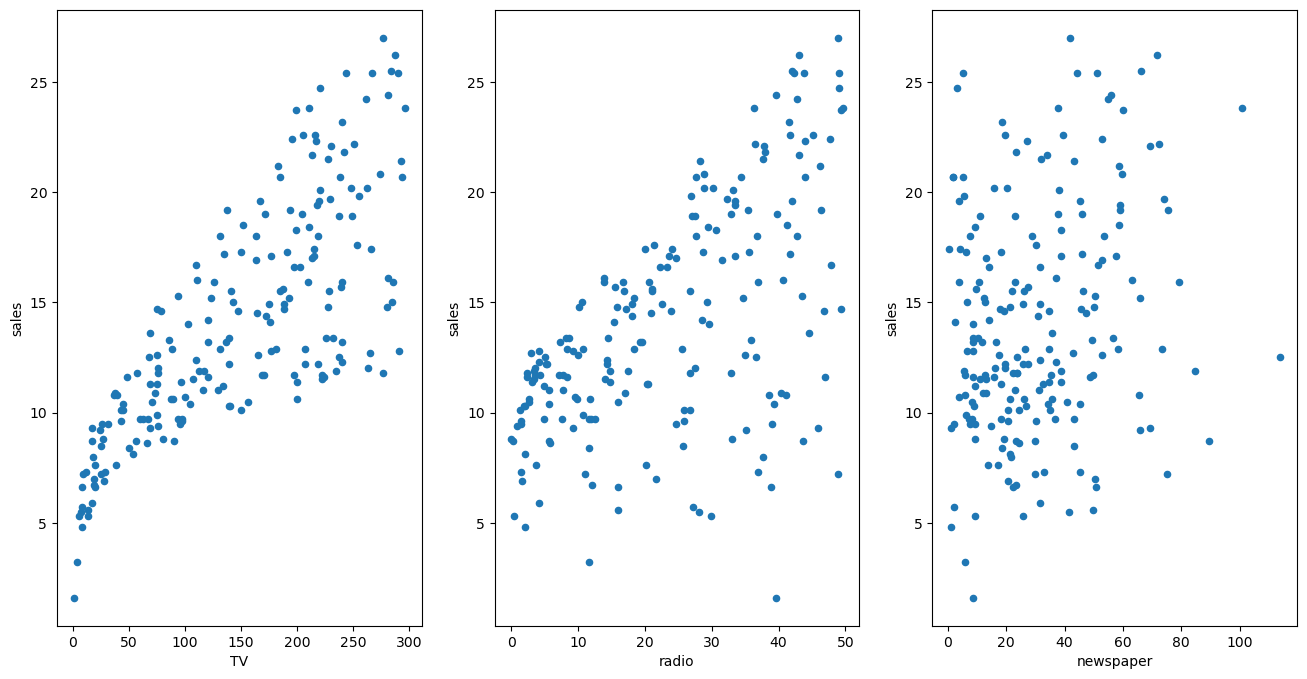

In [38]:
fig, axs = plt.subplots(1, 3)   #(rows,cols)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16,8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

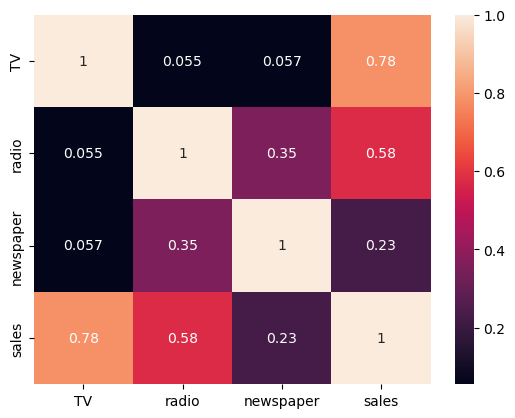

In [39]:
sns.heatmap(data.corr(), annot = True);

In [40]:
# x = data[['TV']].values
# y = data[['sales']].values
feature_cols = ['TV']
x = data[feature_cols] # Features
y = data.sales # Target variable

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 6)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
my_first_model = LinearRegression()

In [46]:
my_first_model.fit(X_train,y_train)

LinearRegression()

In [47]:
my_first_model.coef_[0]

0.048734985332423576

In [48]:
my_first_model.intercept_

6.709103491166478

### Interpreting the coefficients

1. A unit increase in TV ad spending was associated with a .048 unit increase in Sales



### Inference
y = mx + c

You have the values of m and c. Given any value of x you can predict the value of y

In a new market my spend on TV is $50,000. I want you to tell me the sales generated due to this spend

In [49]:
.048*50 + 6.70

9.1

In [50]:
Pred = my_first_model.predict(X_test)

In [51]:
Pred

array([12.83509115, 17.17250484,  8.88755734, 16.33913659, 13.54662193,
        8.50742445, 18.93671131, 13.88776683, 15.52038884,  9.51136515,
       12.60603672, 11.94324092, 20.9835807 , 18.39575297, 11.28531861,
       10.36910089, 11.0124027 ,  7.3475318 ,  7.27930282, 11.46076456,
        7.86899614,  8.80958136, 17.25535432, 19.6336216 , 17.11402286,
       12.06020488,  9.96947401, 11.11474617, 19.51178414, 17.35769779,
       13.49301345, 14.6675266 , 13.09826007, 10.08156448,  7.06486888,
       17.92302362, 20.04786898, 17.44542076, 15.27184041, 13.59535692,
        7.54734524, 16.9775649 , 12.10406637, 17.54776423, 10.0133355 ,
       14.91607502,  9.14585276, 13.29807351,  8.0152011 , 15.86640724])

In [52]:
y_test

118    15.9
11     17.4
149    10.1
152    16.6
145    10.3
134    10.8
93     22.2
19     14.6
4      12.9
6      11.8
151    11.6
94     11.5
30     21.4
81     12.3
156    15.3
115    12.6
88     12.9
108     5.3
158     7.3
13      9.7
12      9.2
38     10.1
52     22.6
131    12.7
84     21.7
89     16.7
49      9.7
107     8.7
54     20.2
181    12.2
116    12.2
95     16.9
64     18.0
18     11.3
56      5.5
0      22.1
137    20.8
128    24.7
112    14.1
120    15.5
2       9.3
59     18.4
87     16.0
100    11.7
16     12.5
173    11.7
170     8.4
99     17.2
72      8.8
103    14.7
Name: sales, dtype: float64

To complete the supervised learning flow follow the below steps after fitting the model

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

### Evaluation on Train Data

In [54]:
my_linear_preds_train = my_first_model.predict(X_train)
print('MAE on Train Data :', mean_absolute_error(my_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_linear_preds_train,y_train)))
print('R-squared on Train Data :', my_first_model.score(X_train, y_train))

MAE on Train Data : 2.559717184958041
MSE on Train Data : 10.89210545248742
RMSE on Train Data : 3.300318992535028
R-squared on Train Data : 0.6232434761028465


### Evaluation on Test Data

In [55]:
my_model_preds = my_first_model.predict(X_test)
print('MAE on Train Data :', mean_absolute_error(my_model_preds,y_test))
print('MSE on Train Data :', mean_squared_error(my_model_preds,y_test))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_model_preds,y_test)))
print('R-squared on Train Data :', my_first_model.score(X_test, y_test))

MAE on Train Data : 2.469197684055691
MSE on Train Data : 9.503191696866343
RMSE on Train Data : 3.0827247196054244
R-squared on Train Data : 0.5600153407297688


### Multiple Linear Regression

In [56]:
# features = data[['TV','radio','newspaper']]
# target = data[['sales']]
feature_cols = ['TV', 'radio', 'newspaper']
x = data[feature_cols] # Features
y = data.sales # Target variable

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 10, train_size = .80)

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [60]:
my_multiple_linear_model = LinearRegression()

In [61]:
my_multiple_linear_model.fit(X_train,y_train)

LinearRegression()

In [63]:
my_multiple_linear_model.coef_[0]

0.04377260306304603

In [64]:
my_multiple_linear_model.intercept_

3.2540971144188866

In [69]:
Pred1 = my_multiple_linear_model.predict(X_test)

In [70]:
Pred1

array([18.1625299 , 12.92663232, 18.0531098 , 23.64464668, 20.70438374,
       14.28227997, 14.94493548, 21.38232981, 21.17508238, 12.73110461,
       24.00312134,  7.21544071, 12.24762152, 19.24345998, 19.38241854,
       13.45643798, 19.6247089 ,  9.2531648 , 21.13268075, 20.90762408,
       15.53485445, 10.92529369, 22.82955184, 15.8122438 , 17.42515749,
        8.16218669, 11.89783444, 12.70337575, 21.74138085,  7.96215368,
       12.50099965, 20.45535282,  4.72120047,  4.72259288, 16.75292333,
       15.75804986,  6.74415499, 17.73477354,  9.01591827, 13.617599  ])

In [71]:
y_test

59     18.4
5       7.2
20     18.0
198    25.5
52     22.6
19     14.6
162    14.9
55     23.7
69     22.3
2       9.3
98     25.4
10      8.6
75      8.7
142    20.1
124    19.7
63     14.0
109    19.8
78      5.3
111    21.8
185    22.6
154    15.6
130     1.6
61     24.2
87     16.0
102    14.8
121     7.0
136     9.5
1      10.4
47     23.2
172     7.6
159    12.9
39     21.5
76      6.9
91      7.3
35     12.8
178    11.8
127     8.8
169    15.0
46     10.6
174    11.5
Name: sales, dtype: float64

### Evaluation on Train data

In [72]:
my_multiple_linear_preds_train = my_multiple_linear_model.predict(X_train)
print('MAE on Train Data :', mean_absolute_error(my_multiple_linear_preds_train,y_train))
print('MSE on Train Data :', mean_squared_error(my_multiple_linear_preds_train,y_train))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds_train,y_train)))
print('R-squared on Train Data :', my_multiple_linear_model.score(X_train, y_train))

MAE on Train Data : 1.0661435033472693
MSE on Train Data : 1.8585966709492503
RMSE on Train Data : 1.3633035872281898
R-squared on Train Data : 0.9209087553499528


### Evaluation on Test Data

In [73]:
my_multiple_linear_preds = my_multiple_linear_model.predict(X_test)
print('MAE on Train Data :', mean_absolute_error(my_multiple_linear_preds,y_test))
print('MSE on Train Data :', mean_squared_error(my_multiple_linear_preds,y_test))
print('RMSE on Train Data :', np.sqrt(mean_squared_error(my_multiple_linear_preds,y_test)))
print('R-squared on Train Data :', my_multiple_linear_model.score(X_test, y_test))

MAE on Train Data : 1.8850130310423154
MSE on Train Data : 6.700486756528873
RMSE on Train Data : 2.5885298446278098
R-squared on Train Data : 0.8353672324670594
